# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

from qiskit import *
from qiskit_aer import AerSimulator
from qiskit_aer.noise import (NoiseModel, depolarizing_error)
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV1, Options

In [35]:
token = '' # Put in your IBM token
QiskitRuntimeService.save_account(channel="ibm_quantum", token=token, overwrite= True)

# Functions for writing CI-Regime SOP Circuits

In [5]:
def twirled_cz(qc, qubit1, qubit2):
    """
    twirl is an integer in {0, 1, ... 15}, representing one of possible 16 Pauli twirls of {I, X, Y, Z}^{otimes 2} in 4-ary.
    repeats is some (odd) number for which the CZ is repeated.
    """
    for _ in range(1):
        twirl = np.random.randint(16)
        match twirl:
            case 0: # II
                qc.cz(qubit1, qubit2)

            case 1:
                qc.x(qubit2)
                qc.cz(qubit1, qubit2)
                qc.z(qubit1)
                qc.x(qubit2)
            
            case 2:
                qc.z(qubit2)
                qc.cz(qubit1, qubit2)
                qc.z(qubit2)

            case 3:
                qc.y(qubit2)
                qc.cz(qubit1, qubit2)
                qc.z(qubit1)
                qc.y(qubit2)

            case 4:
                qc.x(qubit1)
                qc.cz(qubit1, qubit2)
                qc.x(qubit1)
                qc.z(qubit2)

            case 5:
                qc.x(qubit1)
                qc.x(qubit2)
                qc.cz(qubit1, qubit2)
                qc.y(qubit1)
                qc.y(qubit2)

            case 6:
                qc.x(qubit1)
                qc.z(qubit2)
                qc.cz(qubit1, qubit2)
                qc.x(qubit1)

            case 7:
                qc.x(qubit1)
                qc.y(qubit2)
                qc.cz(qubit1, qubit2)
                qc.y(qubit1)
                qc.x(qubit2)

            case 8:
                qc.z(qubit1)
                qc.cz(qubit1, qubit2)
                qc.z(qubit1)

            case 9:
                qc.z(qubit1)
                qc.x(qubit2)
                qc.cz(qubit1, qubit2)
                qc.x(qubit2)

            case 10:
                qc.z(qubit1)
                qc.z(qubit2)
                qc.cz(qubit1, qubit2)
                qc.z(qubit1)
                qc.z(qubit2)

            case 11:
                qc.z(qubit1)
                qc.y(qubit2)
                qc.cz(qubit1, qubit2)
                qc.y(qubit2)

            case 12:
                qc.y(qubit1)
                qc.cz(qubit1, qubit2)
                qc.y(qubit1)
                qc.z(qubit2)

            case 13:
                qc.y(qubit1)
                qc.x(qubit2)
                qc.cz(qubit1, qubit2)
                qc.x(qubit1)
                qc.y(qubit2)

            case 14:
                qc.y(qubit1)
                qc.z(qubit2)
                qc.cz(qubit1, qubit2)
                qc.y(qubit1)

            case 15:
                qc.y(qubit1)
                qc.y(qubit2)
                qc.cz(qubit1, qubit2)
                qc.x(qubit1)
                qc.x(qubit2)

def twirled_cx(qc, qubit1, qubit2):
    """
    twirl is an integer in {0, 1, ... 15}, representing one of possible 16 Pauli twirls of {I, X, Y, Z}^{otimes 2} in 4-ary.
    1 is some (odd) number for which the CX is repeated.
    qubit 1 is the control
    """
    for _ in range(1):
        twirl = np.random.randint(16)
        match twirl:
            case 0:
                qc.cx(qubit1, qubit2)

            case 1:
                qc.x(qubit2)
                qc.cx(qubit1, qubit2)
                qc.x(qubit2)
            
            case 2:
                qc.z(qubit2)
                qc.cx(qubit1, qubit2)
                qc.z(qubit1)
                qc.z(qubit2)

            case 3:
                qc.y(qubit2)
                qc.cx(qubit1, qubit2)
                qc.z(qubit1)
                qc.y(qubit2)

            case 4:
                qc.x(qubit1)
                qc.cx(qubit1, qubit2)
                qc.x(qubit1)
                qc.x(qubit2)

            case 5:
                qc.x(qubit1)
                qc.x(qubit2)
                qc.cx(qubit1, qubit2)
                qc.x(qubit1)

            case 6:
                qc.x(qubit1)
                qc.z(qubit2)
                qc.cx(qubit1, qubit2)
                qc.y(qubit1)
                qc.y(qubit2)

            case 7:
                qc.x(qubit1)
                qc.y(qubit2)
                qc.cx(qubit1, qubit2)
                qc.y(qubit1)
                qc.z(qubit2)

            case 8:
                qc.z(qubit1)
                qc.cx(qubit1, qubit2)
                qc.z(qubit1)

            case 9:
                qc.z(qubit1)
                qc.x(qubit2)
                qc.cx(qubit1, qubit2)
                qc.z(qubit1)
                qc.x(qubit2)

            case 10:
                qc.z(qubit1)
                qc.z(qubit2)
                qc.cx(qubit1, qubit2)
                qc.z(qubit2)

            case 11:
                qc.z(qubit1)
                qc.y(qubit2)
                qc.cx(qubit1, qubit2)
                qc.y(qubit2)

            case 12:
                qc.y(qubit1)
                qc.cx(qubit1, qubit2)
                qc.y(qubit1)
                qc.x(qubit2)

            case 13:
                qc.y(qubit1)
                qc.x(qubit2)
                qc.cx(qubit1, qubit2)
                qc.y(qubit1)
    

            case 14:
                qc.y(qubit1)
                qc.z(qubit2)
                qc.cx(qubit1, qubit2)
                qc.x(qubit1)
                qc.y(qubit2)

            case 15:
                qc.y(qubit1)
                qc.y(qubit2)
                qc.cx(qubit1, qubit2)
                qc.x(qubit1)
                qc.z(qubit2)

def twirled_rxx(qc, phi, qubit1, qubit2):
    qc.h([qubit1, qubit2])
    twirled_cx(qc, qubit1, qubit2)
    qc.rz(phi, qubit2)
    twirled_cx(qc, qubit1, qubit2)
    qc.h([qubit1, qubit2])

In [6]:
def generate_SOP2(phi, s, s3, rot):
    qr = QuantumRegister(2)
    qc = QuantumCircuit(qr)

    qc.h(qr)

    if s == 1:
        qc.z(0)
    if s3 == 1:
        qc.z(1)

    twirled_cz(qc, 0, 1)
    qc.h(1)

    qc.rx(phi, 0)

    if rot == 0:
        qc.rx(phi, 1)
    else:
        qc.rx(-phi, 1)

    qc.measure_all()

    return qc

def generate_SOP4(phi, s, s3, s5, rot):
    qr = QuantumRegister(3)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr, cr)

    qc.h(qr)

    if s == 1:
        qc.z(0)
    if s3 == 1:
        qc.z(1)
    if s5 == 1:
        qc.z(2)
    
    twirled_cz(qc, 0, 1)
    qc.h(1)

    twirled_cz(qc, 1, 2)
    qc.h(2)

    twirled_rxx(qc, phi, 0, 1)
    twirled_rxx(qc, phi, 1, 2)
    qc.rx(phi, 0)

    if rot == 0:
        qc.rx(phi, 2)
    else:
        qc.rx(-phi, 2)

    qc.measure(0, 0)
    qc.measure(2, 1)

    return qc

def generate_SOP6(phi, s, s3, s5, s7):
    qr = QuantumRegister(4)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr, cr)

    qc.h(qr)

    if s == 1:
        qc.z(0)
    if s3 == 1:
        qc.z(1)
    if s5 == 1:
        qc.z(2)
    if s7 == 1:
        qc.z(3)
    
    twirled_cz(qc, 0, 1)
    qc.h(1)

    twirled_cz(qc, 1, 2)
    qc.h(2)

    twirled_cz(qc, 2, 3)
    qc.h(3)

    twirled_rxx(qc, phi, 0, 1)
    twirled_rxx(qc, phi, 2, 3)
    qc.rx(phi, 0)
    qc.rx(phi, 3)

    qc.measure(0, 0)
    qc.measure(3, 1)

    return qc

In [7]:
def generate_SOP_2_circuits(phi, repeats=1):
    qc_list = []
    for _ in range(repeats):
        for rot in range(2):
            for s3 in range(2):
                for s in range(2):
                    qc_list.append(generate_SOP2(phi, s, s3, rot))
    return qc_list

def generate_SOP_4_circuits(phi, repeats=1):
    qc_list = []
    for _ in range(repeats):
        for rot in range(2):
            for s5 in range(2):
                for s3 in range(2):
                    for s in range(2):
                        qc_list.append(generate_SOP4(phi, s, s3, s5, rot))
    return qc_list

def generate_SOP_6_circuits(phi, repeats=1):
    qc_list = []
    for _ in range(repeats):
        for s7 in range(2):
            for s5 in range(2):
                for s3 in range(2):
                    for s in range(2):
                        qc_list.append(generate_SOP6(phi, s, s3, s5, s7))
    return qc_list

# Running the CI-ansatz SOP circuits

In [2]:
best_qubits = [43, 44, 45, 46]
shots_num = 10000
phi_ar = [np.pi/4]
num_repeats_SOP = 18

In [22]:
service = QiskitRuntimeService()
backend = service.backend("ibm_quebec")

In [23]:
with Session(service=service, backend=backend) as session:
    options = Options()
    options.resilience_level = 1
    options.optimization_level = 0
    sampler = SamplerV1(session=session, options=options)
    print(session.details())
    print(session.status())

    for phi in phi_ar:
        qc_list_SOP_2 = transpile(generate_SOP_2_circuits(phi, repeats=num_repeats_SOP), backend=backend, initial_layout=best_qubits[0:2])
        print(session.status())
        qc_list_SOP_4 = transpile(generate_SOP_4_circuits(phi, repeats=num_repeats_SOP), backend=backend, initial_layout=best_qubits[0:3])
        print(session.status())
        qc_list_SOP_6 = transpile(generate_SOP_6_circuits(phi, repeats=num_repeats_SOP), backend=backend, initial_layout=best_qubits)
        print(session.status())

        job_exp_SOP_2 = sampler.run(qc_list_SOP_2, shots=shots_num//8)
        job_exp_SOP_4 = sampler.run(qc_list_SOP_4, shots=shots_num//16)
        job_exp_SOP_6 = sampler.run(qc_list_SOP_6, shots=shots_num//16)
        print(session.status())

{'id': 'csxt1jeyn5c0008bwnpg', 'backend_name': 'ibm_quebec', 'interactive_timeout': 60, 'max_time': 28800, 'active_timeout': 28800, 'state': 'open', 'accepting_jobs': True, 'last_job_started': None, 'last_job_completed': None, 'started_at': None, 'closed_at': None, 'activated_at': None}
Pending
Pending
Pending
Pending
In progress, accepting new jobs


# Post-processing Data

In [2]:
job_names = ["csxsrr3fhyd0008kak90", "csxsrrvyn5c0008bwmgg", "csxsrsbyn5c0008bwmhg", "csxt4k2faem0008wyp5g", "csxt4kje88ng008q6n8g", "csxt4ma8cwag008wpa1g"]

In [ ]:
def decimal_to_bin(base10):
    zero_dig = str(base10 // 2**0 % 2)
    one_dig = str(base10 // 2**1 % 2)
    return one_dig + zero_dig

def convert_to_counts(quasi_dist_dict, shots):
    count_dict = {}
    for key, val in quasi_dist_dict.items():
        count_dict[decimal_to_bin(int(key))] = val * shots
    return count_dict

In [76]:
def convert_bin(s):
    if s == 0:
        return 1
    else:
        return -1

def SOP2_expectation(counts_list):
    i = 0
    plus_counts = 0
    minus_counts = 0

    for rot in range(2):
        for s3 in range(2):
            for s in range(2):
                counts = counts_list[i]
                states = counts.keys()
                for state in states:
                    count = counts.get(state)
                    s2 = convert_bin(int(state[1]))
                    s4 = convert_bin(int(state[0]))
                    if s2 * convert_bin(s3) * s4 == 1:
                        plus_counts += count
                    else:
                        minus_counts += count
                i += 1
    return (plus_counts - minus_counts)/(plus_counts + minus_counts)

def SOP4_expectation(counts_list):
    i = 0
    plus_counts = 0
    minus_counts = 0

    for rot in range(2):
        for s5 in range(2):
            for s3 in range(2):
                for s in range(2):
                    counts = counts_list[i]
                    states = counts.keys()
                    for state in states:
                        count = counts.get(state)
                        s2 = convert_bin(int(state[1]))
                        s6 = convert_bin(int(state[0]))
                        if s2 * convert_bin(s3) * convert_bin(s5) * s6 == 1:
                            plus_counts += count
                        else:
                            minus_counts += count
                    i += 1

    return (plus_counts - minus_counts)/(plus_counts + minus_counts)

def SOP6_expectation(counts_list):
    i = 0
    plus_counts = 0
    minus_counts = 0

    for s7 in range(2):
        for s5 in range(2):
            for s3 in range(2):
                for s in range(2):
                    counts = counts_list[i]
                    states = counts.keys()
                    for state in states:
                        count = counts.get(state)
                        s2 = convert_bin(int(state[1]))
                        s8 = convert_bin(int(state[0]))
                        if s2 * convert_bin(s3) * convert_bin(s5) * convert_bin(s7) * s8 == 1:
                            plus_counts += count
                        else:
                            minus_counts += count
                    i += 1
    return (plus_counts - minus_counts)/(plus_counts + minus_counts)

In [4]:
# Extract quasi_probability distribution dictionaries from files

quasi_dist_list_SOP = []
for job_name in job_names:
    f = open("raw_data/CI_SOP_" + job_name + ".json")
    quasi_dist_f = json.load(f)
    quasi_dist_list_SOP.append(quasi_dist_f)
    f.close()

In [10]:
print(len(quasi_dist_list_SOP[5]))

288


In [29]:
# Convert quasi-probability distributions to counts

all_counts_lists = [[], [], []]
for j in range(len(quasi_dist_list_SOP)):
    run = quasi_dist_list_SOP[j]
    if j % 3 == 0:
        shots = shots_num//8
    else:
        shots = shots_num//16
    for i in range(len(run)):
        all_counts_lists[j % 3].append(convert_to_counts(run[i], shots))

In [36]:
# Calculate expectation values

total_num_repeats = len(quasi_dist_list_SOP) //3 * num_repeats_SOP
exp_vals = []
for j in range(len(all_counts_lists)):
    run = all_counts_lists[j]
    expectations = np.zeros(total_num_repeats)
    for i in range(total_num_repeats):
        if j == 0:
            expectations[i] = SOP2_expectation(run[8*i:8*(i+1)])
        elif j == 1:
            expectations[i] = SOP4_expectation(run[16*i:16*(i+1)])
        else: #j == 2:
            expectations[i] = SOP6_expectation(run[16*i:16*(i+1)])
    exp_vals.append(expectations)
exp_vals = np.array(exp_vals)

In [46]:
SOP_means = np.mean(exp_vals, axis=1)
SOP_errors = np.std(exp_vals, axis=1)/np.sqrt(total_num_repeats)

## Noisy Simulation

In [42]:
shots_num_sim = 100000
phi = np.pi/12
SOP_2_circuits = generate_SOP_2_circuits(phi)
SOP_4_circuits = generate_SOP_4_circuits(phi)
SOP_6_circuits = generate_SOP_6_circuits(phi)

In [12]:
noise_model = NoiseModel()
p_gate = 0

# Add depolarizing error to all 2-qubit gates
error_gate2 = depolarizing_error(p_gate, 2)
noise_model.add_all_qubit_quantum_error(error_gate2, ["cz"])
noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"])

# Print noise model info
print(noise_model)

sim_noise = AerSimulator(noise_model=noise_model)

NoiseModel: Ideal


In [69]:
job_sim_2 = sim_noise.run(SOP_2_circuits, shots=shots_num_sim)
job_sim_result_2 = job_sim_2.result()
job_sim_4 = sim_noise.run(SOP_4_circuits, shots=shots_num_sim)
job_sim_result_4 = job_sim_4.result()
job_sim_6 = sim_noise.run(SOP_6_circuits, shots=shots_num_sim)
job_sim_result_6 = job_sim_6.result()

In [70]:
counts_list_2 = []
counts_list_4 = []
counts_list_6 = []
for i in range(len(SOP_2_circuits)):
    counts_list_2.append(job_sim_result_2.get_counts(i))
for i in range(len(SOP_4_circuits)):
    counts_list_4.append(job_sim_result_4.get_counts(i))
for i in range(len(SOP_6_circuits)):
    counts_list_6.append(job_sim_result_6.get_counts(i))

In [71]:
SOP_list = [SOP2_expectation(counts_list_2), SOP4_expectation(counts_list_4), SOP6_expectation(counts_list_6)]

print(SOP_list)

print(np.cos(phi)**2, np.cos(phi)**4)

[0.9333375, 0.87070125, 0.87029875]
0.9330127018922194 0.8705127018922194


# Plotting

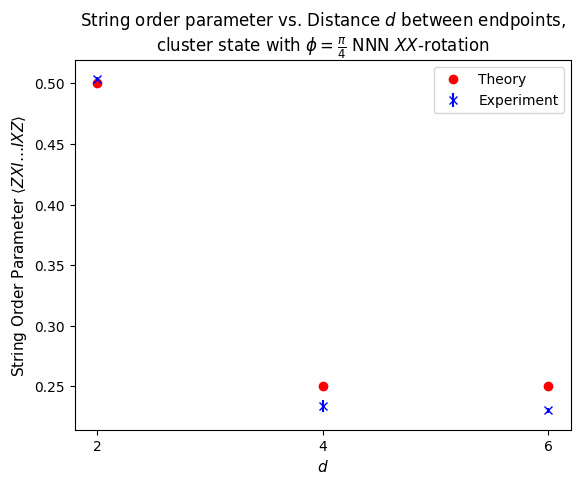

In [6]:
plt.plot([2, 4, 6], [np.cos(phi_ar[0])**2, np.cos(phi_ar[0])**4, np.cos(phi_ar[0])**4], "ro", label="Theory")
plt.errorbar([2, 4, 6], SOP_means, yerr= SOP_errors, color="blue", fmt="x", label="Experiment")
plt.legend(loc="best", fontsize=10)
plt.xlabel(r"$d$", size=11)
plt.xticks([2, 4, 6], [2, 4, 6])
plt.ylabel(r"String Order Parameter $\langle ZXI \ldots IXZ \rangle$", size=11)
plt.title(r"String order parameter vs. Distance $d$ between endpoints," + "\n" + r"cluster state with $\phi = \frac{\pi}{4}$ NNN $XX$-rotation")
plt.savefig("figures/CI_SOP.pdf")

In [49]:
np.savez("processed_data/CI_SOPs.npz", deltas=np.array([2, 4, 6]), SOP_theory=np.array([0.5, 0.25, 0.25]), SOP_exp=SOP_means, SOP_exp_err=SOP_errors)